# Data Wringling 
- Data Preprocessing
- Data cleaning
- What is Data wringling?
  - Raw Data > Collect/clean/fitting/delete/join/split/dubplicate removal > Final Data > Data Analysis?> Graphs> Reports

### Content 
- 1 Handling missing values
-  2 Data Formatting
-  3 Data Normalization
    - Data Scalling
    - Centrallizing
-  4 Data Binning ( for groups of data)
-  5 Making dummies of categorical data 

#### Lets start Hands on practice:
## Import libraries

In [362]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [363]:
sh = sns.load_dataset('titanic')
sh1= sh 
sh2 = sh 
sh3= sh

In [364]:
sh.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Simple Math operation 

In [365]:
(sh['age']+1).head(10)

0    23.0
1    39.0
2    27.0
3    36.0
4    36.0
5     NaN
6    55.0
7     3.0
8    28.0
9    15.0
Name: age, dtype: float64

## Dealing with missing values...
In a daatset missing values are either NaN, N/A, or 0 or a blank cell.
- When we don't have data in a row against a parameter..
#### Steps:
- Either recollect data or check where is mistake
- Remove column with missing values, if there is no effect on sample set.
- Replace the missing values
  ### How..?
- Take mean of whole column and put in missing value
- Frequency or mode replacement( least use of this technique )
- Replace based on other functions.
- Machine learning algorithm can also be used.
- Leave it like that....
  ### Why..?
  -  Its better because no data is lost
  -  less accurate
### Where exactly missing values are...?

In [366]:
sh.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [367]:
sh.shape

(891, 15)

In [368]:
sh.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [369]:
sh.dropna(subset=['deck'],axis=0,inplace=True)

In [370]:
sh.isnull().sum()

survived        0
pclass          0
sex             0
age            19
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
deck            0
embark_town     2
alive           0
alone           0
dtype: int64

### This'll remove specifically
### inplace = true modifies the dataframe..
> To remove null from whole data frame .

In [371]:
# sh= sh.dropna().isnull().sum()
# sh

Which is not good for us 
So now we'll use sh1 data frame, we have saved earlier..


### Replace missing values with the average/mean of that column

In [372]:
m = sh1['age'].mean()
m

35.77945652173913

### Replace mean with Nan of the data frame..

In [373]:
sh1['age']=sh1['age'].replace(np.nan,m)

In [374]:
sh1.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [375]:
sh1.isnull().mean()

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.009852
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.000000
embark_town    0.009852
alive          0.000000
alone          0.000000
dtype: float64

### Data Formatting
- Bring data on a common standard.
- Ensure data is consistant and understandable.
  - Easy to gather
  - Easy to work with
### Know that data type and convert it into the known one 
> (we will use only when we need to change data type but here we dont need to change data type)

In [376]:
sh1.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

#### Use this method to change data type ..
as we have changed survived data type from int64 to float64..

In [377]:
sh['survived']=sh['survived'].astype('float64')
sh.dtypes

survived        float64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Here we'll convert age into days from years..

In [378]:
sh1['age']=sh1['age']*365
sh1.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1.0,1,female,13870.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1.0,1,female,12775.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0.0,1,male,19710.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1.0,3,female,1460.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1.0,1,female,21170.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [379]:
sh1.dtypes

survived        float64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

## Always rename afterwards..

In [380]:
sh1.rename(columns={'age':'age in days'},inplace=True)
sh1.head()

,survived,pclass,sex,age in days,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1.0,1,female,13870.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1.0,1,female,12775.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0.0,1,male,19710.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1.0,3,female,1460.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1.0,1,female,21170.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [381]:
sh1.isnull().sum()

survived       0
pclass         0
sex            0
age in days    0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [382]:
sh1['age in days']=sh1['age in days'].astype('int64')
sh1.dtypes

survived        float64
pclass            int64
sex              object
age in days       int64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [383]:
sh1.isnull().sum()

survived       0
pclass         0
sex            0
age in days    0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

# Data Normalization

- Uniform the data.
- They have same impact
- also for computational reasons

In [384]:
sh1.head(5)

,survived,pclass,sex,age in days,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1.0,1,female,13870,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1.0,1,female,12775,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0.0,1,male,19710,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1.0,3,female,1460,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1.0,1,female,21170,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [385]:
sh5 = sh1[['age in days', 'fare']]
sh5.head(5)

,age in days,fare
1,13870,71.2833
3,12775,53.1000
6,19710,51.8625
10,1460,16.7000
11,21170,26.5500


- Above data is really invalid range and we need to normalize and hard to compare..
- Normalization change the values to the range of 0-to-1 ( now both variables have similar influance on our models.)

# Methods of normalization:-
- Simple Feature scaling.
  - x(new)= x(old)/x(max)
- Min-Max method
- Z-score( standard score) Range -3 -to- +3
- Log Transformation

### 1- Simple Feature Scaling
 

In [386]:
sh1['fare']=sh1['fare']/sh1['fare'].max()
sh1.head()

,survived,pclass,sex,age in days,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1.0,1,female,13870,1,0,0.139136,C,First,woman,False,C,Cherbourg,yes,False
3,1.0,1,female,12775,1,0,0.103644,S,First,woman,False,C,Southampton,yes,False
6,0.0,1,male,19710,0,0,0.101229,S,First,man,True,E,Southampton,no,True
10,1.0,3,female,1460,1,1,0.032596,S,Third,child,False,G,Southampton,yes,False
11,1.0,1,female,21170,0,0,0.051822,S,First,woman,False,C,Southampton,yes,True


In [387]:
sh1['age in days']=sh1['age in days']/sh1['age in days'].max()
sh1.head()

,survived,pclass,sex,age in days,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1.0,1,female,0.4750,1,0,0.139136,C,First,woman,False,C,Cherbourg,yes,False
3,1.0,1,female,0.4375,1,0,0.103644,S,First,woman,False,C,Southampton,yes,False
6,0.0,1,male,0.6750,0,0,0.101229,S,First,man,True,E,Southampton,no,True
10,1.0,3,female,0.0500,1,1,0.032596,S,Third,child,False,G,Southampton,yes,False
11,1.0,1,female,0.7250,0,0,0.051822,S,First,woman,False,C,Southampton,yes,True


# 2- Min-Max Method 
#### Range 0-to-1
> sh1['fare']=(sh1['fare']-sh1['fare'].min())/(sh1['fare'].max()=sh1['fare'].min())

> sh1.head(5)

In [388]:
# sh5['fare']=(sh5['fare']-sh5['fare'].min())/(sh5['fare'].max() - sh5['fare'].min())
# sh5.head(5)

In [389]:
# sh5['age in days']=(sh5['age in days']-sh5['age in days'].min())/(sh5['age in days'].max() - sh5['age in days'].min())
# sh5.head()

# Z-Score (standard Score)  Range 0-to-3
> sh3['fare']=(sh3['fare']-sh3['fare'].mean())/sh3['fare'].std()

> sh3.head()

In [390]:
# sh3['fare']=(sh3['fare']-sh3['fare'].mean())/sh3['fare'].std()
# sh3.head()

# Log-Transformation
- This technique is already used in furtilizer dataset...
> sh1.['fare']=np.log(sh1['fare'])

> sh1.head(5)

In [391]:
df = sh1 

In [392]:
df.head()

,survived,pclass,sex,age in days,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1.0,1,female,0.4750,1,0,0.139136,C,First,woman,False,C,Cherbourg,yes,False
3,1.0,1,female,0.4375,1,0,0.103644,S,First,woman,False,C,Southampton,yes,False
6,0.0,1,male,0.6750,0,0,0.101229,S,First,man,True,E,Southampton,no,True
10,1.0,3,female,0.0500,1,1,0.032596,S,Third,child,False,G,Southampton,yes,False
11,1.0,1,female,0.7250,0,0,0.051822,S,First,woman,False,C,Southampton,yes,True


In [393]:
sh.min()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7376\343405459.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



survived            0.0
pclass                1
sex              female
age in days    0.011473
sibsp                 0
parch                 0
fare                0.0
who               child
adult_male        False
alive                no
alone             False
dtype: object

# Binning 
- Grouping of values into smaller number of values(bins)
- Convert numeric into categorical
- to have better understanding of groups
  - low Vs mid Vs high price..
> Syntax

> bins = np.linespace(min(sh1['age']),max(sh1['age']),1500)
>
> age_groups= ['x','y','z']
> 
> sh1['age in days']=pd.cut(sh1['age'],bins,labels=age_groups,include_lowest=True)
>
> sh1['age in days']


In [394]:
x = sns.load_dataset('titanic')
x.tail(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [395]:
# x['age'].min()

In [396]:
# x['age']=x['age']*365
# x.head(5)

In [397]:
# bins = np.linspace(min(x['age']),max(x['age']),1500)
# age_groups= ['x','y','z']
# x['age']=pd.cut(x['age'],bins,labels=age_groups,include_lowest=True)
# x['age']


# Converting Categorical data into Dummies
- Easy to use for computation.
- male/female > 0/1
    > Syntax 
    > pd.get_dummies(sh1['sex'])

In [398]:
x= pd.get_dummies(x['sex'])
x.head(5)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [399]:
x

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [400]:
sh1.head(5)

,survived,pclass,sex,age in days,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1.0,1,female,0.4750,1,0,0.139136,C,First,woman,False,C,Cherbourg,yes,False
3,1.0,1,female,0.4375,1,0,0.103644,S,First,woman,False,C,Southampton,yes,False
6,0.0,1,male,0.6750,0,0,0.101229,S,First,man,True,E,Southampton,no,True
10,1.0,3,female,0.0500,1,1,0.032596,S,Third,child,False,G,Southampton,yes,False
11,1.0,1,female,0.7250,0,0,0.051822,S,First,woman,False,C,Southampton,yes,True


In [401]:
sh.isnull().sum()

survived       0
pclass         0
sex            0
age in days    0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [402]:
df. drop('embark_town', axis=1, inplace=True)

In [403]:
sh1.shape

(203, 14)

## Cleaned Data/ Ready for analysis Data is Extracted:

In [404]:
sh1.head(5)

,survived,pclass,sex,age in days,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
1,1.0,1,female,0.4750,1,0,0.139136,C,First,woman,False,C,yes,False
3,1.0,1,female,0.4375,1,0,0.103644,S,First,woman,False,C,yes,False
6,0.0,1,male,0.6750,0,0,0.101229,S,First,man,True,E,no,True
10,1.0,3,female,0.0500,1,1,0.032596,S,Third,child,False,G,yes,False
11,1.0,1,female,0.7250,0,0,0.051822,S,First,woman,False,C,yes,True


### Lets Perform Some Analysis on Our Dataset.

[Text(0.5, 1.0, 'Comparison of fare and Age in days, also either they alive or not.')]

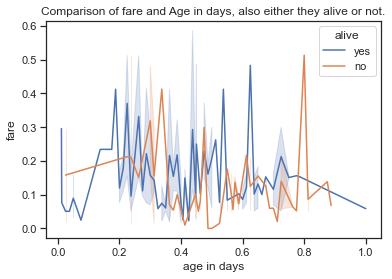

In [429]:
sns.lineplot(data=sh1,x='age in days',y='fare',hue='alive').set(title='Comparison of fare and Age in days, also either they alive or not.')

[Text(0.5, 1.0, 'Comparison of age in days and fare with respect to Sex/gender')]

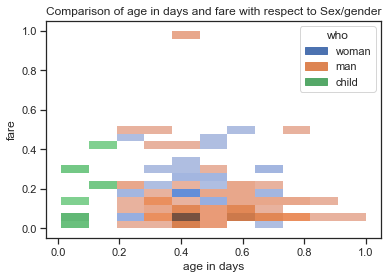

In [435]:
sns.histplot(data=sh1,x='age in days',y='fare',hue='who').set(title='Comparison of age in days and fare with respect to Who')

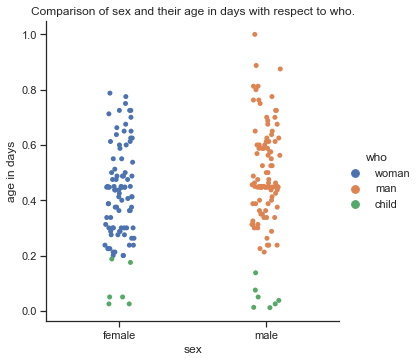

In [437]:
sns.catplot(x='sex',y='age in days',hue='who',data=sh1).set(title='Comparison of sex and their age in days with respect to who.')

<AxesSubplot:xlabel='sex', ylabel='age in days'>

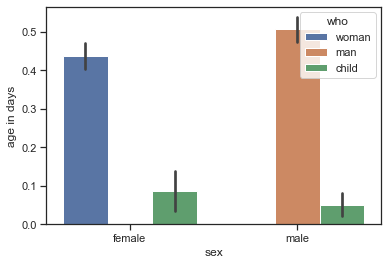

In [408]:
sns.barplot(x='sex',y='age in days',hue='who',data=sh1)

<AxesSubplot:xlabel='sex', ylabel='age in days'>

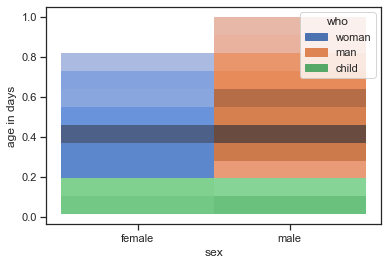

In [409]:
sns.histplot(x='sex',y='age in days',hue='who',data= sh1)

In [410]:
cor_df_furn = sh1.corr()
cor_df_furn

,survived,pclass,age in days,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.035825,-0.228300,0.128490,0.034105,0.125201,-0.593645,-0.153602
pclass,-0.035825,1.000000,-0.284765,-0.085525,0.057333,-0.313060,-0.121974,0.050299
age in days,-0.228300,-0.284765,1.000000,-0.155296,-0.268099,-0.087333,0.308724,0.200633
sibsp,0.128490,-0.085525,-0.155296,1.000000,0.263890,0.289365,-0.186570,-0.648974
parch,0.034105,0.057333,-0.268099,0.263890,1.000000,0.382977,-0.194636,-0.552732
fare,0.125201,-0.313060,-0.087333,0.289365,0.382977,1.000000,-0.124438,-0.302695
adult_male,-0.593645,-0.121974,0.308724,-0.186570,-0.194636,-0.124438,1.000000,0.250123
alone,-0.153602,0.050299,0.200633,-0.648974,-0.552732,-0.302695,0.250123,1.000000


[Text(0.5, 1.0, 'Corelation between all columns to dataframe')]

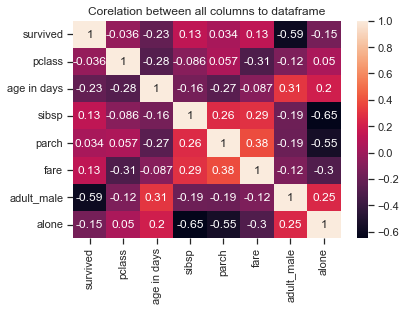

In [438]:
sns.heatmap(cor_df_furn,annot= True).set(title='Corelation between all columns to dataframe')

<AxesSubplot:xlabel='age in days', ylabel='fare'>

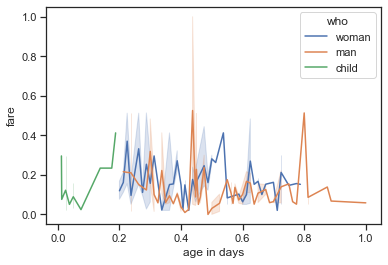

In [412]:
sns.lineplot(x='age in days',y='fare',hue='who',data= sh1)

In [413]:
px.histogram(sh1, x="age in days", y="fare", color="who", marginal="rug",
                   hover_data=sh1.columns)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'histfunc': 'sum',
              'hovertemplate': 'who=woman<br>age in days=%{x}<br>sum of fare=%{y}<extra></extra>',
              'legendgroup': 'woman',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'woman',
              'offsetgroup': 'woman',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([0.475     , 0.4375    , 0.725     , 0.44722603, 0.6125    , 0.475     ,
                          0.3625    , 0.2875    , 0.40623288, 0.44722603, 0.2375    , 0.275     ,
                          0.44722603, 0.625     , 0.55      , 0.725     , 0.3875    , 0.4       ,
                          0.4375    , 0.3625    , 0.375     , 0.725     , 0.4375    , 0.7875    ,
                          0.2375    , 0.625     , 0.44722603, 0.2125    , 0.375     , 0.3       ,
                          0.225     , 0.3875    , 0.5       , 0.45      , 0.45      , 0.2       ,
                          0.5125    , 0.3       , 0.3       , 0.275     , 0.75      , 0.3       ,
                          0.2875    , 0.3       , 0.4125    , 0.44722603, 0.2875    , 0.4375    ,
                          0.675     , 0.3125    , 0.2       , 0.425     , 0.375     , 0.55      ,
                          0.275     , 0.45      , 0.6       , 0.4875    , 0.6625    , 0.4875    ,
                          0.4875    , 0.225     , 0.65      , 0.5       , 0.2625    , 0.3       ,
                          0.44722603, 0.225     , 0.3       , 0.475     , 0.3375    , 0.3625    ,
                          0.2625    , 0.4125    , 0.45      , 0.6375    , 0.7125    , 0.5375    ,
                          0.2125    , 0.6125    , 0.4125    , 0.65      , 0.3375    , 0.775     ,
                          0.4875    , 0.44722603, 0.2       , 0.6       , 0.5875    , 0.7       ,
                          0.2375    ]),
              'xaxis': 'x',
              'y': array([0.13913574, 0.1036443 , 0.05182215, 0.28598956, 0.14976542, 0.1561496 ,
                          0.02049464, 0.51334181, 0.02537431, 0.0436405 , 0.05130158, 0.12999454,
                          0.10735285, 0.05604307, 0.0541074 , 0.28598956, 0.22109808, 0.14891148,
                          0.16293235, 0.02042144, 0.16883676, 0.29953885, 0.26473857, 0.15216447,
                          0.17777476, 0.48312843, 0.02410559, 0.21255864, 0.1111184 , 0.16231419,
                          0.51212189, 0.32179837, 0.26252652, 0.26473857, 0.02537431, 0.11316786,
                          0.26252652, 0.51334181, 0.02537431, 0.10735285, 0.14687822, 0.13526459,
                          0.22109808, 0.03259623, 0.1756683 , 0.10122886, 0.02691961, 0.1756683 ,
                          0.15276642, 0.2958059 , 0.16883676, 0.02049464, 0.18249985, 0.11316786,
                          0.09661757, 0.13858277, 0.07729405, 0.15546645, 0.10048071, 0.10910953,
                          0.21642979, 0.15546645, 0.15276642, 0.29953885, 0.15216447, 0.13526459,
                          0.10149724, 0.44409922, 0.09662576, 0.44409922, 0.02049464, 0.41250333,
                          0.51212189, 0.16883676, 0.2342244 , 0.15216447, 0.02049464, 0.41250333,
                          0.11125659, 0.05061043, 0.1036443 , 0.18249985, 0.02434958, 0.1561496 ,
                          0.16231419, 0.17391982, 0.07690368, 0.05061043, 0.10257897, 0.16231419,
                          0.0585561 ]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'boxpoints': 'all',
              'customdata': array([[1.0, 1, 'female', ..., 'C', 'yes', False],
                                   [1.0, 1, 'female', ..., 'C', 'yes', False],
                                   [1.0, 1, 'female', ..., 'C', 'yes', True],
                                   ...,
                                   [1.0, 1, 'female', ..., 'D', 'yes', False],


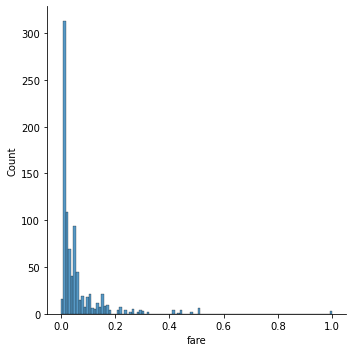

In [ ]:
sns.displot(sh1['fare'])

<AxesSubplot:xlabel='age in days', ylabel='fare'>

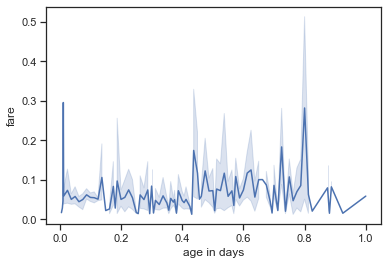

In [ ]:
sns.lineplot(data=sh1,x='age in days',y='fare')

# sns.displot(sh1['age in days'])


<AxesSubplot:>

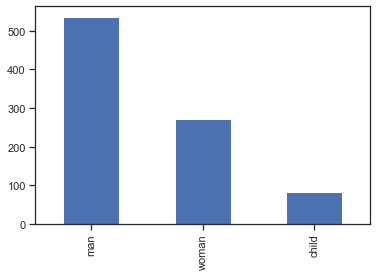

In [ ]:
pd.value_counts(sh1['who']).plot.bar()

array([[<AxesSubplot:title={'center':'survived'}>,
        <AxesSubplot:title={'center':'pclass'}>],
       [<AxesSubplot:title={'center':'age in days'}>,
        <AxesSubplot:title={'center':'sibsp'}>],
       [<AxesSubplot:title={'center':'parch'}>,
        <AxesSubplot:title={'center':'fare'}>]], dtype=object)

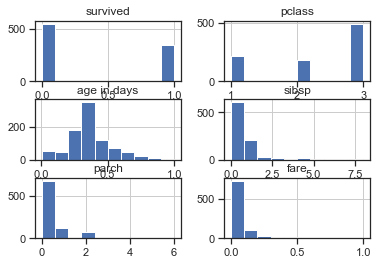

In [ ]:
sh1.hist()

In [418]:

px.scatter(sh1,x=["age in days"],y="who",
	         size="fare", color="who",
                 hover_name="survived", size_max=60,title='Manually specified Graph')
 

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('<b>%{hovertext}</b><br><br>who' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
                                  1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
                                  1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
                                  1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
                                  1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
                                  1.]),
              'legendgroup': 'woman',
              'marker': {'color': '#636efa',
                         'size': array([0.13913574, 0.1036443 , 0.05182215, 0.28598956, 0.14976542, 0.1561496 ,
                                        0.02049464, 0.51334181, 0.02537431, 0.0436405 , 0.05130158, 0.12999454,
                                        0.10735285, 0.05604307, 0.0541074 , 0.28598956, 0.22109808, 0.14891148,
                                        0.16293235, 0.02042144, 0.16883676, 0.29953885, 0.26473857, 0.15216447,
                                        0.17777476, 0.48312843, 0.02410559, 0.21255864, 0.1111184 , 0.16231419,
                                        0.51212189, 0.32179837, 0.26252652, 0.26473857, 0.02537431, 0.11316786,
                                        0.26252652, 0.51334181, 0.02537431, 0.10735285, 0.14687822, 0.13526459,
                                        0.22109808, 0.03259623, 0.1756683 , 0.10122886, 0.02691961, 0.1756683 ,
                                        0.15276642, 0.2958059 , 0.16883676, 0.02049464, 0.18249985, 0.11316786,
                                        0.09661757, 0.13858277, 0.07729405, 0.15546645, 0.10048071, 0.10910953,
                                        0.21642979, 0.15546645, 0.15276642, 0.29953885, 0.15216447, 0.13526459,
                                        0.10149724, 0.44409922, 0.09662576, 0.44409922, 0.02049464, 0.41250333,
                                        0.51212189, 0.16883676, 0.2342244 , 0.15216447, 0.02049464, 0.41250333,
                                        0.11125659, 0.05061043, 0.1036443 , 0.18249985, 0.02434958, 0.1561496 ,
                                        0.16231419, 0.17391982, 0.07690368, 0.05061043, 0.10257897, 0.16231419,
                                        0.0585561 ]),
                         'sizemode': 'area',
                         'sizeref': 0.0002777777777777778,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'woman',
              'orientation': 'h',
              'showlegend': True,
              'type': 'scatter',
              'x': array([0.475     , 0.4375    , 0.725     , 0.44722603, 0.6125    , 0.475     ,
                          0.3625    , 0.2875    , 0.40623288, 0.44722603, 0.2375    , 0.275     ,
                          0.44722603, 0.625     , 0.55      , 0.725     , 0.3875    , 0.4       ,
                          0.4375    , 0.3625    , 0.375     , 0.725     , 0.4375    , 0.7875    ,
                          0.2375    , 0.625     , 0.44722603, 0.2125    , 0.375     , 0.3       ,
                          0.225     , 0.3875    , 0.5       , 0.45      , 0.45      , 0.2       ,
                          0.5125    , 0.3       , 0.3       , 0.275     , 0.75      , 0.3       ,
                          0.2875    , 0.3       , 0.4125    , 0.44722603, 0.2875    , 0.4375    ,
                          0.675     , 0.3125    , 0.2       , 0.425     , 0.375     , 0.55      ,
                          0.275     , 0.45      , 0.6       , 0.4875    , 0.6625    , 0.4875    ,
                          0.4875    , 0.225     , 0.65      , 0.5       , 0.2625    , 0.3       ,
                          0.44722603, 0.225     , 0.3       , 0.475     , 0.3375    , 0.3625    ,
         